**Projeto de Ciência de Dados**

Qual a probabilidade de uma pessoa não aparecer em uma consulta marcada?


### **Importar as bibliotecas**

In [1]:
# Vamos importar as bibliotecas e os módulos
import pandas as pd # Vamos intalar o Pandas
import numpy as np # Vamos instalar o Numpy
import matplotlib as mat # Vamos instalar o matplotlib para criar gráficos
import matplotlib.pyplot as plt # Vamos instalar o plotly
import joblib # Para salvar o melhor modelo como um arquivo
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Modelo de Regressão Linear
from sklearn.preprocessing import MinMaxScaler # Para transformar os dados
from sklearn.model_selection import train_test_split # Para dividir o banco de dados
from sklearn.neighbors import KNeighborsClassifier # Molelo KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree model
from sklearn.neural_network import MLPClassifier # MLP model
# Método para avaliar a acurácia dos modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
%matplotlib inline

### **Processamento, Tratamento e Análise Exploratória dos Dados**

In [2]:
# Vamos carregar os dados coletados
# Note que o arquivo já está na nossa biblioteca
# Vamos renomear o dataframe como df
# A variável Gender foi alterada para binária F = 1 e M = 0
# A variável target ou No-show foi alterada para binária 1= Não compareceu e  0= compareceu a consulta
df = pd.read_csv('consultas_no_show.csv')

In [3]:
# Vamos conhecer o formato do nosso dataframe (df)
df.shape

(110527, 14)

**Dicionário de Dados:**



*   1-  PatientId: Id- código de identificação do paciente
*   2-  AppointmentID: código de identificação da consulta
*   3 - Gender: Male or Female : Macho ou Fêmea (Gênero)
*   4 - ScheduledDay: Data da consulta
*   5 - AppointmentDay: Data em que ocorreu o agendamemnto da consulta
*   6-  Age: Idade do paciente.
*   7 - Neighbourhood: Bairro onde foi marcada a consulta.
*   8 - Scholarship: Escolaridade, 1-Verdadeiro(possui escolaridade) , 0-Falso( não possui) conforme criterios do bolsa familía disponível em: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
*   9 - Hipertension: Se possui Hipertensão 1-Verdadeiro(possui) , 0-Falso( não possui)
*   10 - Diabetes : Se possui Diabetes 1-Verdadeiro(possui) , 0-Falso( não possui)
*   11- Alcoholism: Se alcolismo está presente 1-Verdadeiro(possui) , 0-Falso( não possui)
*   12 - Handcap : Se possui algum tipode deficiência 1-Verdadeiro(possui) , 0-Falso( não possui)
*   13- SMS_received: 1 ou mais mensagens enviadas para os pacientes
*   14- No-show : Comparecimento alterada para númerica, se 1-Não compareceu 0-compareceu


In [4]:
# Queremos entender as primeiras linhas do nosso df
# Podemos escolher a quantidade de linhas que queremos ver
# Observe a quantidade de colunas que nosso df possui
# head = cabeça (primeiras linhas do df)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [5]:
# Também podemos investigar quais são os valores das últimas linhas do nosso df
# head = rabo (últimas linhas do df)
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2572134369293,5651768,1,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735,5650093,1,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893,5630692,1,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557,5630323,1,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0
110526,377511518121127,5629448,1,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,0


In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
df.isnull().values.any()

False

In [8]:
# Informações gerais sobre o df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  int64 
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 11.8+ MB


In [9]:
# describe = medidas estatísticas básicas do df
df.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.475046e+14,5.675306e+06,0.649977,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560982e+14,7.129568e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,5.628261e+06,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173879e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174490e+13,5.680574e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [10]:
# Retirando as colunas PatientID e AppointmentID, são dados sem relevância, gerados pelo sistema de consultas
df = df.drop(['PatientId', 'AppointmentID'], axis =1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  int64 
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 10.1+ MB


In [12]:
# Usar a biblioteca SWEETVIZ para fazer EDA
# Para instalar o pacote sweetviz
!pip install sweetviz
# Importando o pacote
import sweetviz as sv
#Utilizando
analise = sv.analyze(df)
analise.show_html('no_show.html')

     |████████████████████████████████| 15.1MB 246kB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


                                             |          | [  0%]   00:00 -> (? left)

Report no_show.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
def plot_corr(df, size=7):
  corr= df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

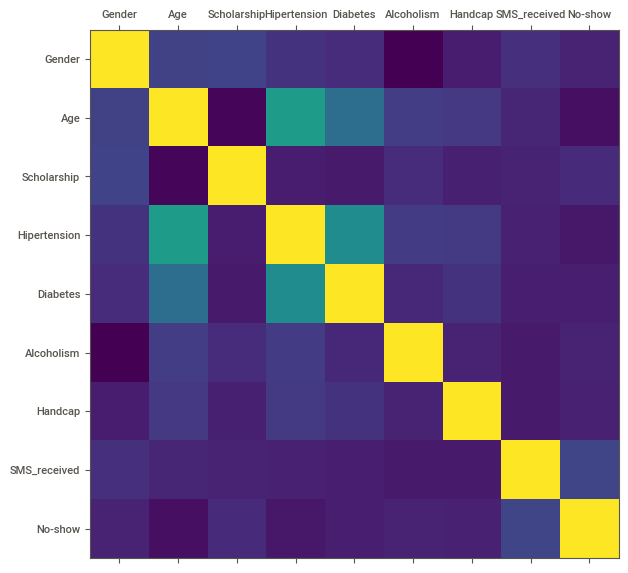

In [14]:
plot_corr(df)

In [15]:
df.corr()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Gender,1.000000,0.106440,0.114293,0.055718,0.032554,-0.106167,-0.022814,0.046298,0.004119
Age,0.106440,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
Scholarship,0.114293,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hipertension,0.055718,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,0.032554,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,-0.106167,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,-0.022814,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,0.046298,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
No-show,0.004119,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


In [16]:
# Outra maneira de avaliar a coorelação entre as variáveis
import seaborn as sns
sns.set(color_codes=True)
cor=df.corr()
cor

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Gender,1.000000,0.106440,0.114293,0.055718,0.032554,-0.106167,-0.022814,0.046298,0.004119
Age,0.106440,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
Scholarship,0.114293,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hipertension,0.055718,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,0.032554,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,-0.106167,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,-0.022814,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,0.046298,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
No-show,0.004119,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


Com base neste conjunto de dados a maior correlação para a nossa variável target se da com a variável SMS_received, que indica se uma ou mais mensagens foram enviadas para avisar o cliente da consulta.

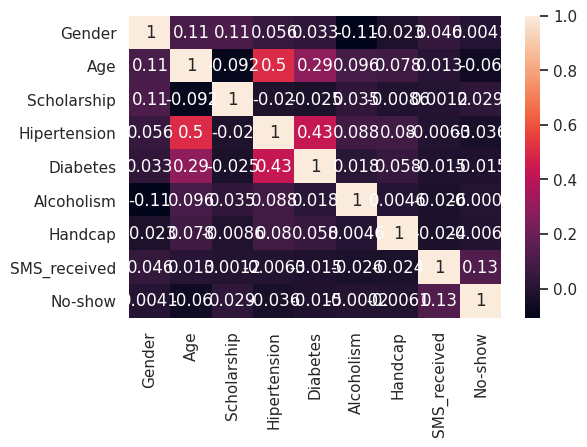

In [17]:
# Matriz de Correlação
sns.heatmap(cor,annot=True)

In [18]:
num_true = len(df.loc[df['No-show'] == 1])
num_false = len(df.loc[df['No-show'] == 0])
print("Número de faltas em consultas: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de comparecimento nas consultas  : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de faltas em consultas: 22319 (20.19%)
Número de comparecimento nas consultas  : 88208 (79.81%)


Observamos que com base neste conjunto de dados a probabilidade de uma pessoa marcar uma consulta, e não comparecer é de 20.19% de chances.

In [19]:
sms_true = len(df.loc[df['SMS_received'] == 1])
sms_false = len(df.loc[df['SMS_received'] == 0])
print("Número de consultas onde foram enviados SMS: {0} ({1:2.2f}%)".format(sms_true, (sms_true/ (sms_true + sms_false)) * 100))
print("Número de consultas onde não foram enviados SMS : {0} ({1:2.2f}%)".format(sms_false, (sms_false/ (sms_true + sms_false)) * 100))

Número de consultas onde foram enviados SMS: 35482 (32.10%)
Número de consultas onde não foram enviados SMS : 75045 (67.90%)


In [20]:
#procurando o número de faltas para consultas com sms enviado
sms_and_no_show =(len(df.loc[df['SMS_received'] == 1])) & len(df.loc[df['No-show'] == 1])

In [21]:
# aqui esta o número
print(sms_and_no_show)

522


In [22]:
print("Número de consultas onde foram enviados SMS e o paciente não compareceu: {0} ({1:2.2f}%)".format(sms_and_no_show, (sms_and_no_show/ (sms_true + sms_false)) * 100))

Número de consultas onde foram enviados SMS e o paciente não compareceu: 522 (0.47%)


Verificamos que a probabilidade de o paciente não comparecer a consulta se um SMS for enviado para alertá-lo é de 0,47%, para este conjunto de dados , reforçando portanto a correlação identificada, entre as variáveis SMS_received e No-show de 0.126431.

### **Dividir o Banco de Dados**

Para melhorar a análise, vamos dividir nosso banco de dados em 2: 

1.   Banco de dados de treino
2.   Banco de dados de teste

In [23]:
import sklearn as sk
sk.__version__

'0.22.2.post1'

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Retirando as colunas PatientID e AppointmentDay, as datas não poderão ser trabalhadas no scikit-learning.
df = df.drop(['ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis =1)

In [26]:
#retirando a variável Neighbourhood, por ser a descrição do bairro não entrará modelo
atributos = ['Gender', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',]

In [27]:
atributos_prev= ['No-show']

In [28]:
X = df[atributos].values
y = df[atributos_prev].values

In [29]:
X

array([[ 1, 62,  0, ...,  0,  0,  0],
       [ 0, 56,  0, ...,  0,  0,  0],
       [ 1, 62,  0, ...,  0,  0,  0],
       ...,
       [ 1, 21,  0, ...,  0,  0,  1],
       [ 1, 38,  0, ...,  0,  0,  1],
       [ 1, 54,  0, ...,  0,  0,  1]])

In [30]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [31]:
split_test_size = 0.20

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [34]:
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

80.00% nos dados de treino
20.00% nos dados de teste


In [35]:
X_treino

array([[ 1, 25,  0, ...,  0,  0,  0],
       [ 0, 62,  0, ...,  0,  0,  0],
       [ 1, 65,  0, ...,  0,  0,  0],
       ...,
       [ 1, 38,  0, ...,  0,  0,  0],
       [ 1, 18,  1, ...,  0,  0,  0],
       [ 0,  9,  1, ...,  0,  0,  1]])

### **Vamos verificar o split dos dados**

In [36]:
print("Original No-Show = True : {0} ({1:0.2f}%)".format(len(df.loc[df['No-show'] == 1]), 
                                               (len(df.loc[df['No-show'] ==1])/len(df.index) * 100)))

print("Original No-Show = False : {0} ({1:0.2f}%)".format(len(df.loc[df['No-show'] == 0]), 
                                               (len(df.loc[df['No-show'] == 0])/len(df.index) * 100)))
print("")
print("Training No-Show = True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training No-Show = False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test No-Show = True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test No-Show = False {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original No-Show = True : 22319 (20.19%)
Original No-Show = False : 88208 (79.81%)

Training No-Show = True : 17882 (20.22%)
Training No-Show = False : 70539 (79.78%)

Test No-Show = True : 4437 (20.07%)
Test No-Show = False 17669 (79.93%)


### **Valores Missing Ocultos**

In [37]:
df.isnull().values.any()

False

In [38]:
# não existem valores sem preenchimento no df, uma vez que as variáveis estão preenchidas com 0 ou 1
df.isna().values.any()

False

In [39]:
#comprovando dataset todo preenchido corretamente o que é um milagre
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing Age: {0}".format(len(df.loc[df['Age'] == 'NA'])))
print("# Linhas missing Scholarship : {0}".format(len(df.loc[df['Scholarship'] == 'NA'])))
print("# Linhas missing Hipertension: {0}".format(len(df.loc[df['Hipertension'] == 'NA'])))
print("# Linhas missing Diabetes: {0}".format(len(df.loc[df['Diabetes'] == 'NA'])))
print("# Linhas missing Alcoholism: {0}".format(len(df.loc[df['Alcoholism'] == 'NA'])))
print("# Linhas missing Handcap: {0}".format(len(df.loc[df['Handcap'] == 'NA'])))
print("# Linhas missing SMS_received: {0}".format(len(df.loc[df['SMS_received'] == 'NA'])))
#não necessita de tratamento de dados missing ou NA

# Linhas no dataframe 110527
# Linhas missing Age: 0
# Linhas missing Scholarship : 0
# Linhas missing Hipertension: 0
# Linhas missing Diabetes: 0
# Linhas missing Alcoholism: 0
# Linhas missing Handcap: 0
# Linhas missing SMS_received: 0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Gender        110527 non-null  int64
 1   Age           110527 non-null  int64
 2   Scholarship   110527 non-null  int64
 3   Hipertension  110527 non-null  int64
 4   Diabetes      110527 non-null  int64
 5   Alcoholism    110527 non-null  int64
 6   Handcap       110527 non-null  int64
 7   SMS_received  110527 non-null  int64
 8   No-show       110527 non-null  int64
dtypes: int64(9)
memory usage: 7.6 MB


# **Resultados**

### **Modelo de Regressão Logística**

In [41]:
# implementar o modelo
modelo_lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_lr.fit(X_treino, Y_treino.ravel())
y_forecast_lr = modelo_lr.predict(X_teste)

In [42]:
print(f'Acurácia do Modelo de Regressão Logística: {accuracy_score(Y_teste, y_forecast_lr)*100}')
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_lr, labels = [1, 0]))

Acurácia do Modelo de Regressão Logística: 79.92852619198408

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4437
           0       0.80      1.00      0.89     17669

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Multilayer Perceptron (MLP)**

In [43]:
# Building MLP model
modelo_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1)

# Training MLP model
modelo_mlp.fit(X_treino, Y_treino)

# Testing MLP model
y_forecast_mlp = modelo_mlp.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [44]:
print(f'Acurácia do Modelo de Regressão Logística: {accuracy_score(Y_teste, y_forecast_mlp)*100}')
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_mlp, labels = [1, 0]))

Acurácia do Modelo de Regressão Logística: 79.92852619198408

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4437
           0       0.80      1.00      0.89     17669

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **KNN (K nearest neighbor)**

In [45]:
# Building KNN model with 5 neighbors (K=5)
modelo_KNN = KNeighborsClassifier(n_neighbors=5)

# Training the KNN model
modelo_KNN.fit(X_treino, Y_treino)

# Testing the KNN model
y_forecast_KNN = modelo_KNN.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [46]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, y_forecast_KNN)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_KNN, labels = [1, 0]))

Exatidão (Accuracy): 0.7738

Classification Report
              precision    recall  f1-score   support

           1       0.24      0.06      0.10      4437
           0       0.80      0.95      0.87     17669

    accuracy                           0.77     22106
   macro avg       0.52      0.51      0.48     22106
weighted avg       0.69      0.77      0.72     22106



### **Decision Tree**

In [47]:
# Building Tree model 
modelo_tree = DecisionTreeClassifier(random_state=1)

# Training the Tree model
modelo_tree.fit(X_treino, Y_treino)

# Testing the Tree model
y_forecast_tree = modelo_tree.predict(X_teste)

In [48]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, y_forecast_tree)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_tree, labels = [1, 0]))

Exatidão (Accuracy): 0.7970

Classification Report
              precision    recall  f1-score   support

           1       0.38      0.02      0.03      4437
           0       0.80      0.99      0.89     17669

    accuracy                           0.80     22106
   macro avg       0.59      0.51      0.46     22106
weighted avg       0.72      0.80      0.72     22106



### **Classificador Naive Bayes**

In [49]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Criando o modelo preditivo
modelo_NB = GaussianNB()

# Treinando o modelo
modelo_NB.fit(X_treino, Y_treino.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
from sklearn import metrics
y_forecast_NB = modelo_NB.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, y_forecast_NB)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_NB, labels = [1, 0]))

Exatidão (Accuracy): 0.7910

Classification Report
              precision    recall  f1-score   support

           1       0.33      0.04      0.07      4437
           0       0.80      0.98      0.88     17669

    accuracy                           0.79     22106
   macro avg       0.56      0.51      0.48     22106
weighted avg       0.71      0.79      0.72     22106



### **Comparando a acurácia (exatidão) dos modelos**

In [51]:
# Comparing models accuracy
print(f'Acurácia do Modelo MLP: {accuracy_score(Y_teste, y_forecast_mlp)*100}')
print(f'Acurácia do Modelo KNN: {accuracy_score(Y_teste, y_forecast_KNN)*100}')
print(f'Acurácia do Modelo Decision Tree: {accuracy_score(Y_teste, y_forecast_tree)*100}')
print(f'Acurácia do Modelo NB: {accuracy_score(Y_teste, y_forecast_NB)*100}')
print(f'Acurácia do Modelo de Regressão Logística: {accuracy_score(Y_teste, y_forecast_lr)*100}')


Acurácia do Modelo MLP: 79.92852619198408
Acurácia do Modelo KNN: 77.37718266533973
Acurácia do Modelo Decision Tree: 79.70234325522483
Acurácia do Modelo NB: 79.10069664344522
Acurácia do Modelo de Regressão Logística: 79.92852619198408


### **Vamos fazer previsões com o modelo treinado!**

In [52]:
import pickle

In [53]:
filename = 'modelo_lr_treinado.sav'
pickle.dump(y_forecast_lr, open(filename, 'wb'))

In [62]:
X_teste

array([[ 1, 20,  0, ...,  0,  0,  0],
       [ 1, 37,  0, ...,  0,  0,  1],
       [ 1, 38,  0, ...,  0,  0,  0],
       ...,
       [ 1, 22,  1, ...,  0,  0,  0],
       [ 1, 39,  0, ...,  0,  0,  1],
       [ 1,  3,  0, ...,  0,  0,  0]])

In [63]:
prev = pd.DataFrame(X_teste)

In [65]:
prev

,0,1,2,3,4,5,6,7
0,1,20,0,0,0,0,0,0
1,1,37,0,0,0,0,0,1
2,1,38,0,0,0,0,0,0
3,1,24,0,0,0,0,0,1
4,1,41,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
22101,1,61,1,1,1,0,0,0
22102,0,34,0,0,0,0,0,1
22103,1,22,1,0,0,0,0,0
22104,1,39,0,1,0,0,0,1


#Referências:
https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe

 https://www.kaggle.com/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv.
 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

